<a href="https://colab.research.google.com/github/BillyImperial/ProjetoGit/blob/main/Assignment_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPRegressor
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

In [129]:
uploaded = files.upload()

In [139]:
df = pd.read_csv('CC GENERAL.csv')

In [131]:
df.shape

(8950, 18)

In [140]:
df = df.drop(['CUST_ID'], axis = 1)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [141]:
df['CREDIT_LIMIT'].fillna(value = df['CREDIT_LIMIT'].min(), inplace = True)

In [142]:
df['MINIMUM_PAYMENTS'].fillna(value = df['MINIMUM_PAYMENTS'].min(), inplace = True)

In [143]:
df1 = df[df['BALANCE'] < df['BALANCE'].quantile(.95)]
df1 = df[df['PURCHASES'] < df['PURCHASES'].quantile(.95)]
df1 = df[df['ONEOFF_PURCHASES'] < df['ONEOFF_PURCHASES'].quantile(.95)]
df1 = df[df['CASH_ADVANCE'] < df['CASH_ADVANCE'].quantile(.95)]
df1 = df[df['CASH_ADVANCE_TRX'] < df['CASH_ADVANCE_TRX'].quantile(.95)]
df1 = df[df['PURCHASES_TRX'] < df['PURCHASES_TRX'].quantile(.95)]
df1 = df[df['CREDIT_LIMIT'] < df['CREDIT_LIMIT'].quantile(.95)]
df1 = df[df['PAYMENTS'] < df['PAYMENTS'].quantile(.95)]
df1 = df[df['MINIMUM_PAYMENTS'] < df['MINIMUM_PAYMENTS'].quantile(.95)]

In [118]:
df1.shape

(8502, 17)

In [30]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000
mean,1371.790936,0.871493,945.192367,565.242127,380.258365,913.737969,0.486287,0.203383,0.358022,0.131205,3.076100,13.999412,4380.119752,1630.802894,506.338332,0.160562,11.500823
std,1728.990587,0.241362,1921.958290,1469.584919,820.481898,1920.861530,0.400464,0.299554,0.394451,0.196873,6.558593,23.001524,3505.006110,2659.999022,546.853817,0.297769,1.359656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,113.580058,0.857143,37.650000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,375.509992,158.975746,0.000000,12.000000
50%,795.031808,1.000000,353.635000,39.000000,83.355000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,814.885983,263.746169,0.000000,12.000000
75%,1872.690322,1.000000,1073.852500,572.547500,450.000000,1048.304073,0.916667,0.325000,0.750000,0.181818,4.000000,16.000000,6000.000000,1776.851435,677.522155,0.166667,12.000000
max,12323.845360,1.000000,40040.710000,34087.730000,22500.000000,27296.485760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,2716.326216,1.000000,12.000000


#Método do cotovelo para seleção do número de clusters

In [126]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df1)

In [87]:
inertias = []
K = range(1, 10)
for k in K:
  kmeanModel = KMeans(n_clusters = k).fit(df1)
  inertias.append(kmeanModel.inertia_)

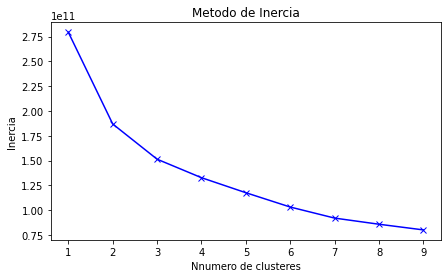

In [88]:
plt.figure(figsize=(7,4))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Nnumero de clusteres')
plt.ylabel('Inercia')
plt.title('Metodo de Inercia')
plt.show()

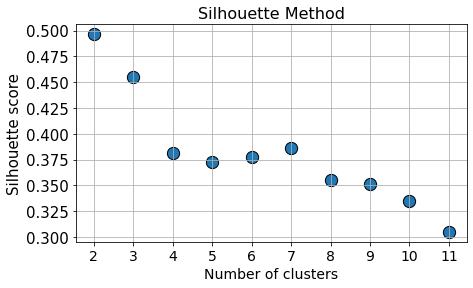

In [89]:
# Nesse exemplo, vamos analisar um outro método para verificação do número de clusteres do nosso
# conjunto de dados, o método da silhueta e o BIC porém, devido a grande variedade de dados, é preciso
# aprendermos algumas coisas novas.
# Fonte: https://www.kdnuggets.com/2019/10/clustering-metrics-better-elbow-method.html

alvo = df1
max = 12
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
gm_bic= []
gm_score=[]
for i in range(2,max):
    km = KMeans(n_clusters=i, random_state=0).fit(alvo)
    preds = km.predict(alvo)
    
    km_scores.append(-km.score(alvo))
    
    silhouette = silhouette_score(alvo,preds)
    km_silhouette.append(silhouette)

# Plotagem do método da Silhouette (Silhueta)
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [90]:
GM = GaussianMixture(max_iter=10*8, n_components=4)
labels = GM.fit_predict(normalized_df)
print("Numero de Clusteres: {}".format(labels))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Numero de Clusteres: [3 1 1 ... 3 1 0]


In [91]:
df1['clusters'] = labels
df1['clusters'] = df1['clusters'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


utilizando o modelo de Redes Neurais para Regressão do Sklearn

In [95]:
X = df1.drop(['CREDIT_LIMIT'], axis = 1)
y = df1['CREDIT_LIMIT']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [97]:
regr = MLPRegressor()
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor()

In [100]:
y_pred = regr.predict(X_test)

In [101]:
print("R² = {}".format(r2_score(y_test, y_pred)))
print("RMSE = {}".format(mean_squared_error(y_test, y_pred, squared=False)))
print("MAE = {}".format(mean_absolute_error(y_test, y_pred)))

R² = 0.44135711958611823
RMSE = 2614.9263020437884
MAE = 1820.1519823796807


In [125]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000
mean,1371.790936,0.871493,945.192367,565.242127,380.258365,913.737969,0.486287,0.203383,0.358022,0.131205,3.076100,13.999412,4380.119752,1630.802894,506.338332,0.160562,11.500823
std,1728.990587,0.241362,1921.958290,1469.584919,820.481898,1920.861530,0.400464,0.299554,0.394451,0.196873,6.558593,23.001524,3505.006110,2659.999022,546.853817,0.297769,1.359656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,113.580058,0.857143,37.650000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,375.509992,158.975746,0.000000,12.000000
50%,795.031808,1.000000,353.635000,39.000000,83.355000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,814.885983,263.746169,0.000000,12.000000
75%,1872.690322,1.000000,1073.852500,572.547500,450.000000,1048.304073,0.916667,0.325000,0.750000,0.181818,4.000000,16.000000,6000.000000,1776.851435,677.522155,0.166667,12.000000
max,12323.845360,1.000000,40040.710000,34087.730000,22500.000000,27296.485760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,2716.326216,1.000000,12.000000


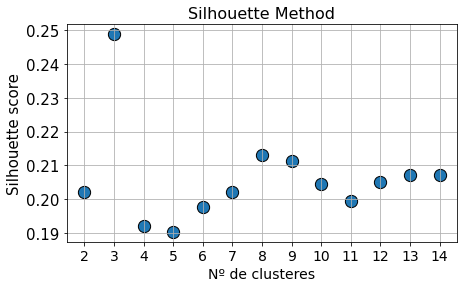

In [128]:
#Library Import
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


  
alvo = normalized_df
max = 15
km_silhouette = []

for i in range(2,max):
    km = KMeans(n_clusters=i, random_state=0).fit(alvo)
    preds = km.predict(alvo)
    km_scores.append(-km.score(alvo))
    silhouette = silhouette_score(alvo,preds)
    km_silhouette.append(silhouette)

# Plotagem do método da Silhouette (Silhueta)
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Nº de clusteres",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [147]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler() 
scaled_df = df1

# Normalizing
normalized_df = normalize(scaled_df,axis=1)

# PCA
pca = PCA()
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
# Plotagem da clusterização (em 2D)
plt.title('Clusterização - Mistura Gaussiana',fontsize=25)
plt.scatter(normalized_df, normalized_df,  
           c = GaussianMixture(n_components = 8).fit_predict(X_principal), alpha = 0.6,cmap='Blues') 
plt.show() 

ValueError: ignored